# Analyzing the different regions and their correlations

Useful links:

* https://en.wikibooks.org/wiki/Introducing_Julia/DataFrames

In [1]:
# Packages we will use throughout this notebook (only first time)
Pkg.add("UMAP")
Pkg.add("Makie")
Pkg.add("XLSX")
Pkg.add("VegaDatasets")
Pkg.add("MultivariateStats")
Pkg.add("RDatasets")
Pkg.add("StatsBase")
Pkg.add("Statistics")
Pkg.add("LinearAlgebra")
Pkg.add("Plots")
Pkg.add("ScikitLearn")
Pkg.add("MLBase")
Pkg.add("Distances")

LoadError: UndefVarError: Pkg not defined

In [9]:
# Packages we will use throughout this notebook
using UMAP
using Makie
using XLSX
using VegaDatasets
using DataFrames
using MultivariateStats
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using ScikitLearn
using MLBase
using Distances

In [10]:
using PlotlyJS

In [11]:
using DataFrames

In [12]:
using CSV

In [13]:
features = DataFrame(CSV.File("data/Kidney_Sample_Annotations.txt"))

,SlideName,ScanName,ROILabel,SegmentLabel,SegmentDisplayName
,String,String,Int64,String,String
1,disease3,disease3_scan,7,Geometric Segment,disease3_scan | 007 | Geometric Segment
2,disease3,disease3_scan,8,Geometric Segment,disease3_scan | 008 | Geometric Segment
3,disease3,disease3_scan,9,Geometric Segment,disease3_scan | 009 | Geometric Segment
4,disease3,disease3_scan,10,Geometric Segment,disease3_scan | 010 | Geometric Segment
5,disease3,disease3_scan,11,Geometric Segment,disease3_scan | 011 | Geometric Segment
6,disease3,disease3_scan,12,Geometric Segment,disease3_scan | 012 | Geometric Segment
7,disease3,disease3_scan,13,Geometric Segment,disease3_scan | 013 | Geometric Segment
8,disease3,disease3_scan,14,Geometric Segment,disease3_scan | 014 | Geometric Segment
9,disease3,disease3_scan,15,Geometric Segment,disease3_scan | 015 | Geometric Segment


In [14]:
structuresDict = Dict("abnormal"=>"Glom (Abnormal)","healthy"=>"Glom (Abnormal)"," PanCK" => "Tub. Distal", " neg" => "Tub. Proximal")

Dict{String, String} with 4 entries:
  " PanCK"   => "Tub. Distal"
  "healthy"  => "Glom (Abnormal)"
  " neg"     => "Tub. Proximal"
  "abnormal" => "Glom (Abnormal)"

In [15]:
comprehensiveStates=[structuresDict[ismissing(row.pathology) ? split(row["SegmentDisplayName"],"|")[3] : row.pathology] for row in eachrow(features)]

231-element Vector{String}:
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 ⋮
 "Tub. Distal"
 "Tub. Proximal"
 "Tub. Distal"
 "Tub. Proximal"
 "Tub. Distal"
 "Tub. Proximal"
 "Tub. Distal"
 "Tub. Proximal"
 "Tub. Distal"
 "Tub. Proximal"
 "Glom (Abnormal)"
 "Glom (Abnormal)"

In [16]:
PCM = DataFrame(CSV.File("data/Kidney_Q3Norm_TargetCountMatrix.txt"))

,TargetName,disease3_scan | 001 | PanCK,disease3_scan | 001 | neg,disease3_scan | 002 | PanCK
,String,Float64,Float64,Float64
1,PADI2,6.01291,8.6185,11.7082
2,CYP24A1,9.2198,7.87978,7.48021
3,SUPT16H,14.0301,16.252,14.9604
4,ZMIZ2,20.4439,19.9457,28.2947
5,SPAG9,19.2413,16.0058,14.9604
6,AMELX,8.41807,7.38729,10.082
7,VPS33B,17.6379,13.5434,10.4073
8,DDX58,11.625,11.8197,15.9361
9,CDV3,22.0473,19.6994,20.164


In [21]:
M =log2.( Matrix(PCM[:,2:end]))

16084×231 Matrix{Float64}:
 2.58806  3.10744  3.54944  3.0556   …  2.10744  4.10744  3.10744  3.10744
 3.20473  2.97815  2.90308  3.0556      3.6924   3.10744  4.6924   3.10744
 3.81046  4.02255  3.90308  3.62878     2.10744  4.10744  3.10744  3.10744
 4.3536   4.318    4.82246  4.51823     3.10744  4.10744  4.6924   4.10744
 4.26614  4.00052  3.90308  4.20584     4.42937  5.10744  5.6924   4.10744
 3.07349  2.88505  3.33371  3.22161  …  2.10744  4.10744  4.10744  3.10744
 4.1406   3.75951  3.37952  3.42597     2.10744  3.10744  3.10744  3.10744
 3.53915  3.56312  3.99423  4.35626     3.6924   3.10744  4.6924   3.10744
 4.46253  4.30008  4.33371  4.2679      3.10744  4.6924   5.91479  5.6924
 3.89063  3.73304  3.90308  3.9075      2.10744  4.10744  3.10744  4.10744
 3.8511   3.95543  3.90308  3.65224  …  3.6924   4.10744  3.10744  3.10744
 4.23576  4.1279   4.33371  4.1899      4.10744  3.10744  3.10744  3.10744
 3.53915  3.40442  3.37952  3.31276     2.10744  3.10744  4.10744  3.10744

In [22]:
data = M
data = (data .- mean(data,dims = 2))./ std(data,dims=2)

16084×231 Matrix{Float64}:
 -0.438769    0.343997    1.01016    …   1.85113     0.343997    0.343997
  0.430114    0.167543    0.0805424      0.317362    2.15408     0.317362
 -0.225605    0.216819   -0.0323936      0.393897   -1.6921     -1.6921
 -0.294366   -0.379032    0.820918      -0.879908    0.511543   -0.879908
 -1.03539    -1.57457    -1.77238        0.67242     1.85987    -1.35754
  0.205299   -0.0941417   0.618795   …   1.84825     1.84825     0.259241
  1.34163     0.653975   -0.0317113     -0.522665   -0.522665   -0.522665
 -0.485761   -0.442053    0.344272      -1.27319     1.61771    -1.27319
 -0.571053   -0.878699   -0.81501       -0.135731    2.17923     1.75806
  0.14383    -0.174276    0.168968       0.581495   -1.43715     0.581495
 -0.260292   -0.0566543  -0.158838   …   0.240016   -1.71172    -1.71172
  0.18802    -0.0153005   0.372663      -1.93892    -1.93892    -1.93892
  0.855428    0.650619    0.612765       0.199178    1.71927     0.199178
  ⋮               

In [23]:
p = fit(PCA,data,maxoutdim=2)

PCA(indim = 16084, outdim = 2, principalratio = 0.1654558588732398)

In [24]:
P = projection(p)

16084×2 Matrix{Float64}:
  0.00957288  -0.00109703
  0.00289128  -0.0118863
 -0.00319794   0.00286057
 -0.00256249  -0.00595151
 -0.00818133  -0.00379386
  0.00441227  -0.00846495
  0.00917499   0.000210562
  0.00690527   0.00782234
 -0.0130453    0.00105453
  0.00160151   0.00560009
 -0.00215438   0.00440184
 -0.0087233   -0.00990253
  0.00442555  -0.00533214
  ⋮           
  0.0110778    0.00125665
  0.00852286  -0.00511006
 -0.00737406  -0.000746797
  0.00866377   0.0193074
 -0.00293698  -0.00453512
 -0.00699974  -0.000313704
  0.00434622  -0.00844659
 -0.00107313  -0.015126
  0.00833398  -0.0130318
 -0.00874286  -0.0204491
  0.00862556   0.00577746
  0.00123999   0.00366095

In [25]:
Yte = MultivariateStats.transform(p, data) #notice that Yte[:,1] is the same as P'*(data[1,:]-mean(p))

2×231 Matrix{Float64}:
  51.8939   81.2008   38.4686   75.4926  …  35.9909    45.569   47.8878
 -40.7609  -36.6923  -41.5636  -34.9053     -3.15425  -19.7528  -0.330803

In [26]:
CSV.write("PCA_matrix_log2.txt",Tables.table(Yte))

"PCA_matrix_log2.txt"

In [35]:
Yte=Matrix(CSV.read("PCA_matrix.txt",DataFrame))

2×231 Matrix{Float64}:
  46.3309   79.6646   29.9858   73.4009  …   40.0674   55.2621   49.9721
 -41.4498  -44.9247  -39.806   -40.8212     -14.8971  -37.1187  -17.6628

In [27]:
patientState="normal"
PlotlyJS.plot(
        Yte[1,features[!, "disease_status"] .== patientState[1]],
        Yte[2,features[!, "disease_status"] .== patientState[1]],
        Layout(
          #  xaxis_type = xaxis_type == "Linear" ? "linear" : "log",
            xaxis_title = "pca_1",
            yaxis_title = "pca_2",
           # yaxis_type = yaxis_type == "Linear" ? "linear" : "log",
            hovermode = "closest",
            height = 450,
        ),
        kind = "scatter",
        mode = "markers",
        marker_size = 15,
        marker_opacity = 0.5,
        marker_line_width = 0.5,
        marker_line_color = "white",
)

data: [
  "scatter with fields marker, mode, type, x, and y"
]

layout: "layout with fields height, hovermode, margin, xaxis, and yaxis"

In [20]:
using WebIO
WebIO.install_jupyter_labextension()

┌ Info: Using default Jupyter executable at `/Library/Frameworks/Python.framework/Versions/3.8/bin/jupyter`; to use a different executable, see the documentation by running `?WebIO.install_jupyter_labextension`.
└ @ WebIO /Users/urieluval/.julia/packages/WebIO/Fy9h1/deps/jupyter.jl:198


An error occured.
ValueError: No linked package for @webio/webio
See the log file for details:  /var/folders/1j/bghpxnvd61zffqv6ytzxqgg40000gn/T/jupyterlab-debug-quncc9wq.log
An error occured.
ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
See the log file for details:  /var/folders/1j/bghpxnvd61zffqv6ytzxqgg40000gn/T/jupyterlab-debug-qdy0nn_8.log
An error occured.
ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
See the log file for details:  /var/folders/1j/bghpxnvd61zffqv6ytzxqgg40000gn/T/jupyterlab-debug-w0w3y2v0.log


LoadError: failed process: Process(`[4m/Library/Frameworks/Python.framework/Versions/3.8/bin/jupyter[24m [4mlabextension[24m [4minstall[24m [4m--no-build[24m [4m@webio/jupyter-lab-provider@0.8.15[24m`, ProcessExited(1)) [1]


In [19]:
import Pkg; Pkg.add("WebIO")

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
    Updating `~/.julia/environments/v1.6/Project.toml`
  [0f1e0344] + WebIO v0.8.15
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
Precompiling project...
  ✓ Libepoxy_jll
  ✓ Qt5Base_jll
  ✓ GR_jll
  ✓ GR
  ✓ GTK3_jll
  ✓ Gtk
  ✓ InspectDR
  ✓ Plots
8 dependencies successfully precompiled in 70 seconds (286 already precompiled)


In [28]:
#To plot we need to know which points are what...
#Preliminarily, we can use this:
segmentDisplayNames=features[!,r"SegmentDi."]

,SegmentDisplayName
,String
1,disease3_scan | 007 | Geometric Segment
2,disease3_scan | 008 | Geometric Segment
3,disease3_scan | 009 | Geometric Segment
4,disease3_scan | 010 | Geometric Segment
5,disease3_scan | 011 | Geometric Segment
6,disease3_scan | 012 | Geometric Segment
7,disease3_scan | 013 | Geometric Segment
8,disease3_scan | 014 | Geometric Segment
9,disease3_scan | 015 | Geometric Segment


In [29]:
healthy=[!occursin(r"disease.",seg) for seg in segmentDisplayNames[!,1]];

In [30]:
glomeruli = [occursin(r".Geo.",seg) for seg in segmentDisplayNames[!,1]];
distTub = [occursin(r".Pan.",seg) for seg in segmentDisplayNames[!,1]];
proxTub = [occursin(r".neg",seg) for seg in segmentDisplayNames[!,1]];

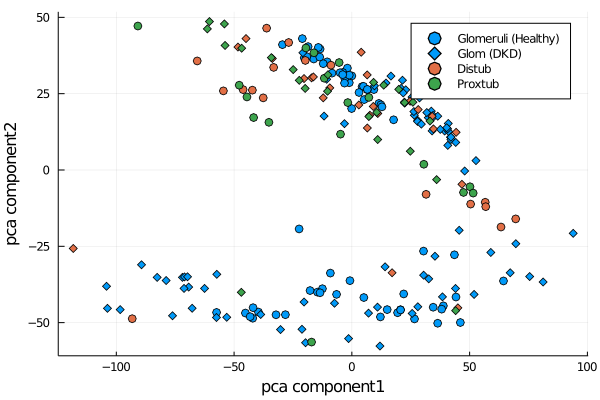

In [31]:
Plots.scatter(Yte[1,healthy.& glomeruli],Yte[2,healthy.& glomeruli],color=1,label="Glomeruli (Healthy)",marker=:o)
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,.!(healthy).& glomeruli],Yte[2,.!(healthy).& glomeruli],color=1,label="Glom (DKD)",marker=:d)
Plots.scatter!(Yte[1,healthy.& distTub],Yte[2,healthy.& distTub],color=2,label="Distub",marker=:o)
Plots.scatter!(Yte[1,.!(healthy).& distTub],Yte[2,.!(healthy).& distTub],color=2,label=:none, marker=:d)
Plots.scatter!(Yte[1,healthy.& proxTub],Yte[2,healthy.& proxTub],color=3,label="Proxtub",marker=:o)
Plots.scatter!(Yte[1,.!(healthy).& proxTub],Yte[2,.!(healthy).& proxTub],color=3,label=:none, marker=:d)

In [ ]:
a=[stat for stat in unique(features[!,"disease_status"])]

In [ ]:
@show a

In [ ]:
Plots.png("glomAndTubs.png")

In [ ]:
glomPath = features[!,"pathology"];
glomPath = [ ismissing(x) ? "a" : x for x in glomPath ]

In [ ]:
features.SegmentDisplayName

In [ ]:
Plots.scatter(Yte[1,glomPath.=="healthy"],Yte[2,glomPath.=="healthy"],color=1,label="healthy Glomeruli",marker=:o)
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,glomPath.=="abnormal"],Yte[2,glomPath.=="abnormal"],color=1,label="abnormal Glom",marker=:x)


In [ ]:
Plots.scatter(Yte[1, .!(healthy) .& (glomPath.=="healthy")],Yte[2,.!(healthy) .& (glomPath.=="healthy")],color=1,label="healthy Glomeruli(DKD)",marker=:o)
Plots.scatter!(Yte[1,.!(healthy) .& (glomPath.=="abnormal")],Yte[2,.!(healthy) .& (glomPath.=="abnormal")],color=1,label="abnormal Glom(DKD)",marker=:x)

Plots.scatter!(Yte[1, (healthy) .& (glomPath.=="healthy")],Yte[2,(healthy) .& (glomPath.=="healthy")],color=2,label="healthy Glomeruli(Ctrl)",marker=:o)
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,(healthy) .& (glomPath.=="abnormal")],Yte[2,(healthy) .& (glomPath.=="abnormal")],color=2,label="abnormal Glom(Ctrl)",marker=:x)


In [ ]:
p = fit(PCA,data,maxoutdim=3)
Yte = MultivariateStats.transform(p, data)
scatter3d(Yte[1,:],Yte[2,:],Yte[3,:],legend=false)

In [ ]:
scene = Makie.scatter(Yte[1,:],Yte[2,:],Yte[3,:])

In [ ]:
display(scene)

In [ ]:
car_origin = C[:,:Origin]
carmap = labelmap(car_origin) #from MLBase
uniqueids = labelencode(carmap,car_origin)

In [ ]:
Plots.png("glomeruliDKDvsCtrl.png")

In [ ]:
patients=unique(features[!,"SlideName"])

In [ ]:
patient = patients[1]
patientRegions= features[!,"SlideName"].==patient
healthyGlom = glomPath.=="healthy"
abnormalGlom = glomPath.=="abnormal"
Plots.scatter(Yte[1,patientRegions .& healthyGlom],Yte[2,patientRegions .& healthyGlom],color=1,label="healthy Glomeruli",marker=:o)
Plots.title!(patient)
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,patientRegions .& abnormalGlom],Yte[2,patientRegions .& abnormalGlom],color=1,label="abnormal Glom",marker=:x)